In [1]:
import warnings
warnings.filterwarnings('ignore')

### Importing Libraries

In [2]:
import numpy as np
import pandas as pd         
import matplotlib.pyplot as plt
import seaborn as sns              

### Load Dataset


In [3]:
df=pd.read_csv("train_dataset_final1.csv")
pd.set_option('display.max_columns',None)
df.head()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,Bill_amt1,Bill_amt2,Bill_amt3,Bill_amt4,Bill_amt5,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,5017,2,0,2,60000,25.0,2,2,2,0,0,0,60323.86,60728.22,56472.74,28602.01,22191.53,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0
1,5018,2,1,1,290000,24.0,0,0,-2,-2,-1,0,11157.67,0.00,0.88,0.65,2700.96,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0
2,5019,1,0,2,180000,63.0,0,0,0,0,0,0,47930.96,48921.91,50034.26,50748.90,51902.56,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0
3,5020,1,1,2,210000,43.0,0,0,0,0,0,0,91152.44,92916.01,90652.30,85295.56,80416.75,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0
4,5021,2,0,1,280000,32.0,-2,-2,-2,-2,-2,-2,19666.40,999.04,3186.48,44932.48,2099.77,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0


## Basic EDA Findings

In [4]:
df.shape

(25247, 27)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25247 entries, 0 to 25246
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         25247 non-null  int64  
 1   marriage            25247 non-null  int64  
 2   sex                 25247 non-null  int64  
 3   education           25247 non-null  int64  
 4   LIMIT_BAL           25247 non-null  int64  
 5   age                 25121 non-null  float64
 6   pay_0               25247 non-null  int64  
 7   pay_2               25247 non-null  int64  
 8   pay_3               25247 non-null  int64  
 9   pay_4               25247 non-null  int64  
 10  pay_5               25247 non-null  int64  
 11  pay_6               25247 non-null  int64  
 12  Bill_amt1           25247 non-null  float64
 13  Bill_amt2           25247 non-null  float64
 14  Bill_amt3           25247 non-null  float64
 15  Bill_amt4           25247 non-null  float64
 16  Bill

In [6]:
df.describe()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,Bill_amt1,Bill_amt2,Bill_amt3,Bill_amt4,Bill_amt5,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
count,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25121.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,2.524700e+04,25247.000000,25247.000000,25247.000000,25247.000000,2.524700e+04,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000
mean,17640.000000,1.551907,0.604111,1.852101,168342.060443,35.438199,-0.042857,-0.159544,-0.190359,-0.241415,-0.282568,-0.307680,51170.887938,49092.268745,4.695839e+04,43134.911103,40218.976171,38806.221029,5718.624966,6.047352e+03,5288.910651,4865.960834,4906.766828,5270.499287,44859.647485,0.362962,0.190399
std,7288.325459,0.522629,0.489050,0.797379,129892.784807,9.174998,1.099315,1.173990,1.172636,1.146753,1.114213,1.130864,73250.806650,70695.367650,6.895687e+04,63846.205694,60389.690737,59182.792531,16806.842125,2.400962e+04,17851.879609,15979.116544,15860.726852,17960.816915,62819.226119,5.047206,0.392624
min,5017.000000,0.000000,0.000000,0.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-56043.170000,-546.930000,0.000000
25%,11328.500000,1.000000,0.000000,1.000000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3601.340000,3017.155000,2.753275e+03,2319.615000,1770.625000,1241.710000,999.985000,9.219100e+02,399.990000,300.150000,262.365000,130.070000,4858.670000,0.040000,0.000000
50%,17640.000000,2.000000,1.000000,2.000000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22436.740000,21245.880000,2.008554e+04,19027.840000,18069.760000,17102.580000,2145.020000,2.026830e+03,1844.300000,1500.100000,1513.790000,1500.040000,21102.830000,0.090000,0.000000
75%,23951.500000,2.000000,1.000000,2.000000,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67373.410000,64151.875000,6.022971e+04,54391.160000,50289.525000,49245.195000,5031.150000,5.000190e+03,4600.640000,4014.990000,4099.890000,4018.780000,57136.580000,0.590000,0.000000
max,30263.000000,3.000000,1.000000,6.000000,1000000.000000,79.000000,8.000000,8.000000,8.000000,7.000000,7.000000,8.000000,964511.160000,983931.050000,1.664089e+06,891585.580000,927172.770000,961663.620000,873551.980000,1.684259e+06,896040.150000,621000.080000,426529.180000,528666.150000,877313.830000,205.380000,1.000000


In [7]:
df.isnull().sum()

Customer_ID             0
marriage                0
sex                     0
education               0
LIMIT_BAL               0
age                   126
pay_0                   0
pay_2                   0
pay_3                   0
pay_4                   0
pay_5                   0
pay_6                   0
Bill_amt1               0
Bill_amt2               0
Bill_amt3               0
Bill_amt4               0
Bill_amt5               0
Bill_amt6               0
pay_amt1                0
pay_amt2                0
pay_amt3                0
pay_amt4                0
pay_amt5                0
pay_amt6                0
AVG_Bill_amt            0
PAY_TO_BILL_ratio       0
next_month_default      0
dtype: int64

In age column there are 126 null values, we have to process it before model training

In [8]:
df['next_month_default'].value_counts()

next_month_default
0    20440
1     4807
Name: count, dtype: int64

This clearly shows that data is Imbalance and we have to apply smote or any other balancing technique to balance the dataset, else model will highly overfit after training.

In [9]:
df.columns

Index(['Customer_ID', 'marriage', 'sex', 'education', 'LIMIT_BAL', 'age',
       'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'Bill_amt1',
       'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6',
       'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'AVG_Bill_amt', 'PAY_TO_BILL_ratio', 'next_month_default'],
      dtype='object')

In [10]:
for feature in df.columns:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is Customer_ID and number of categories are 25247
The feature is marriage and number of categories are 4
The feature is sex and number of categories are 2
The feature is education and number of categories are 7
The feature is LIMIT_BAL and number of categories are 80
The feature is age and number of categories are 57
The feature is pay_0 and number of categories are 11
The feature is pay_2 and number of categories are 11
The feature is pay_3 and number of categories are 11
The feature is pay_4 and number of categories are 10
The feature is pay_5 and number of categories are 9
The feature is pay_6 and number of categories are 10
The feature is Bill_amt1 and number of categories are 22374
The feature is Bill_amt2 and number of categories are 21890
The feature is Bill_amt3 and number of categories are 21591
The feature is Bill_amt4 and number of categories are 21277
The feature is Bill_amt5 and number of categories are 21039
The feature is Bill_amt6 and number of categories ar

In [11]:
df.corr()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,Bill_amt1,Bill_amt2,Bill_amt3,Bill_amt4,Bill_amt5,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
Customer_ID,1.000000,-0.017393,0.004581,0.006501,0.009806,-0.000576,-0.011331,-0.003328,-0.006770,-0.001087,-0.003806,-0.009485,0.004518,0.001206,0.001741,-0.003412,-0.002027,-0.002228,-0.006424,0.004651,-0.006785,-0.005603,0.003255,-0.008008,0.000196,0.005761,-0.001893
marriage,-0.017393,1.000000,-0.031876,-0.149530,-0.102085,-0.414754,0.020694,0.023440,0.031506,0.031848,0.031855,0.031112,-0.022649,-0.022283,-0.024456,-0.021517,-0.022759,-0.017913,-0.005005,-0.005017,-0.002042,-0.014098,0.000770,-0.005885,-0.023068,-0.001925,-0.025677
sex,0.004581,-0.031876,1.000000,0.019173,0.023435,-0.090222,-0.051158,-0.066689,-0.060550,-0.060808,-0.052867,-0.043636,-0.032785,-0.029414,-0.022738,-0.020479,-0.014506,-0.013528,-0.001455,-0.001267,-0.007061,-0.002165,-0.003130,-0.005151,-0.023827,0.009846,-0.037537
education,0.006501,-0.149530,0.019173,1.000000,-0.220720,0.175225,0.105422,0.126021,0.113370,0.108537,0.098257,0.081798,0.023942,0.018762,0.013513,0.000154,-0.006971,-0.010858,-0.041479,-0.027946,-0.036983,-0.037789,-0.040498,-0.036625,0.007969,-0.012286,0.026943
LIMIT_BAL,0.009806,-0.102085,0.023435,-0.220720,1.000000,0.142656,-0.268792,-0.294822,-0.283323,-0.264973,-0.246225,-0.230497,0.285441,0.278806,0.282784,0.293360,0.295344,0.292499,0.196326,0.174857,0.211922,0.202445,0.217782,0.217456,0.302158,0.028419,-0.146010
age,-0.000576,-0.414754,-0.090222,0.175225,0.142656,1.000000,-0.041554,-0.053909,-0.053878,-0.047019,-0.052719,-0.047314,0.056507,0.054620,0.055725,0.052364,0.049641,0.046821,0.023516,0.022210,0.028596,0.023101,0.023042,0.020970,0.055528,0.000660,0.017731
pay_0,-0.011331,0.020694,-0.051158,0.105422,-0.268792,-0.041554,1.000000,0.667648,0.569559,0.535307,0.507752,0.470861,0.188125,0.190502,0.180601,0.180563,0.179458,0.176039,-0.075146,-0.065768,-0.067040,-0.063562,-0.052644,-0.056000,0.192420,-0.053761,0.312943
pay_2,-0.003328,0.023440,-0.066689,0.126021,-0.294822,-0.053909,0.667648,1.000000,0.766510,0.662837,0.624032,0.575934,0.236959,0.236705,0.225303,0.223837,0.220041,0.218701,-0.079962,-0.055125,-0.051767,-0.045585,-0.032368,-0.034709,0.239527,-0.040970,0.252125
pay_3,-0.006770,0.031506,-0.060550,0.113370,-0.283323,-0.053878,0.569559,0.766510,1.000000,0.775747,0.686512,0.630682,0.211674,0.241016,0.230533,0.230243,0.225488,0.222844,0.005069,-0.063653,-0.051070,-0.045088,-0.030403,-0.035709,0.238982,-0.039154,0.226015
pay_4,-0.001087,0.031848,-0.060808,0.108537,-0.264973,-0.047019,0.535307,0.662837,0.775747,1.000000,0.818685,0.711637,0.206846,0.231091,0.249721,0.251628,0.245902,0.241398,-0.004862,-0.000758,-0.063861,-0.042891,-0.029602,-0.027231,0.249515,-0.034663,0.207488


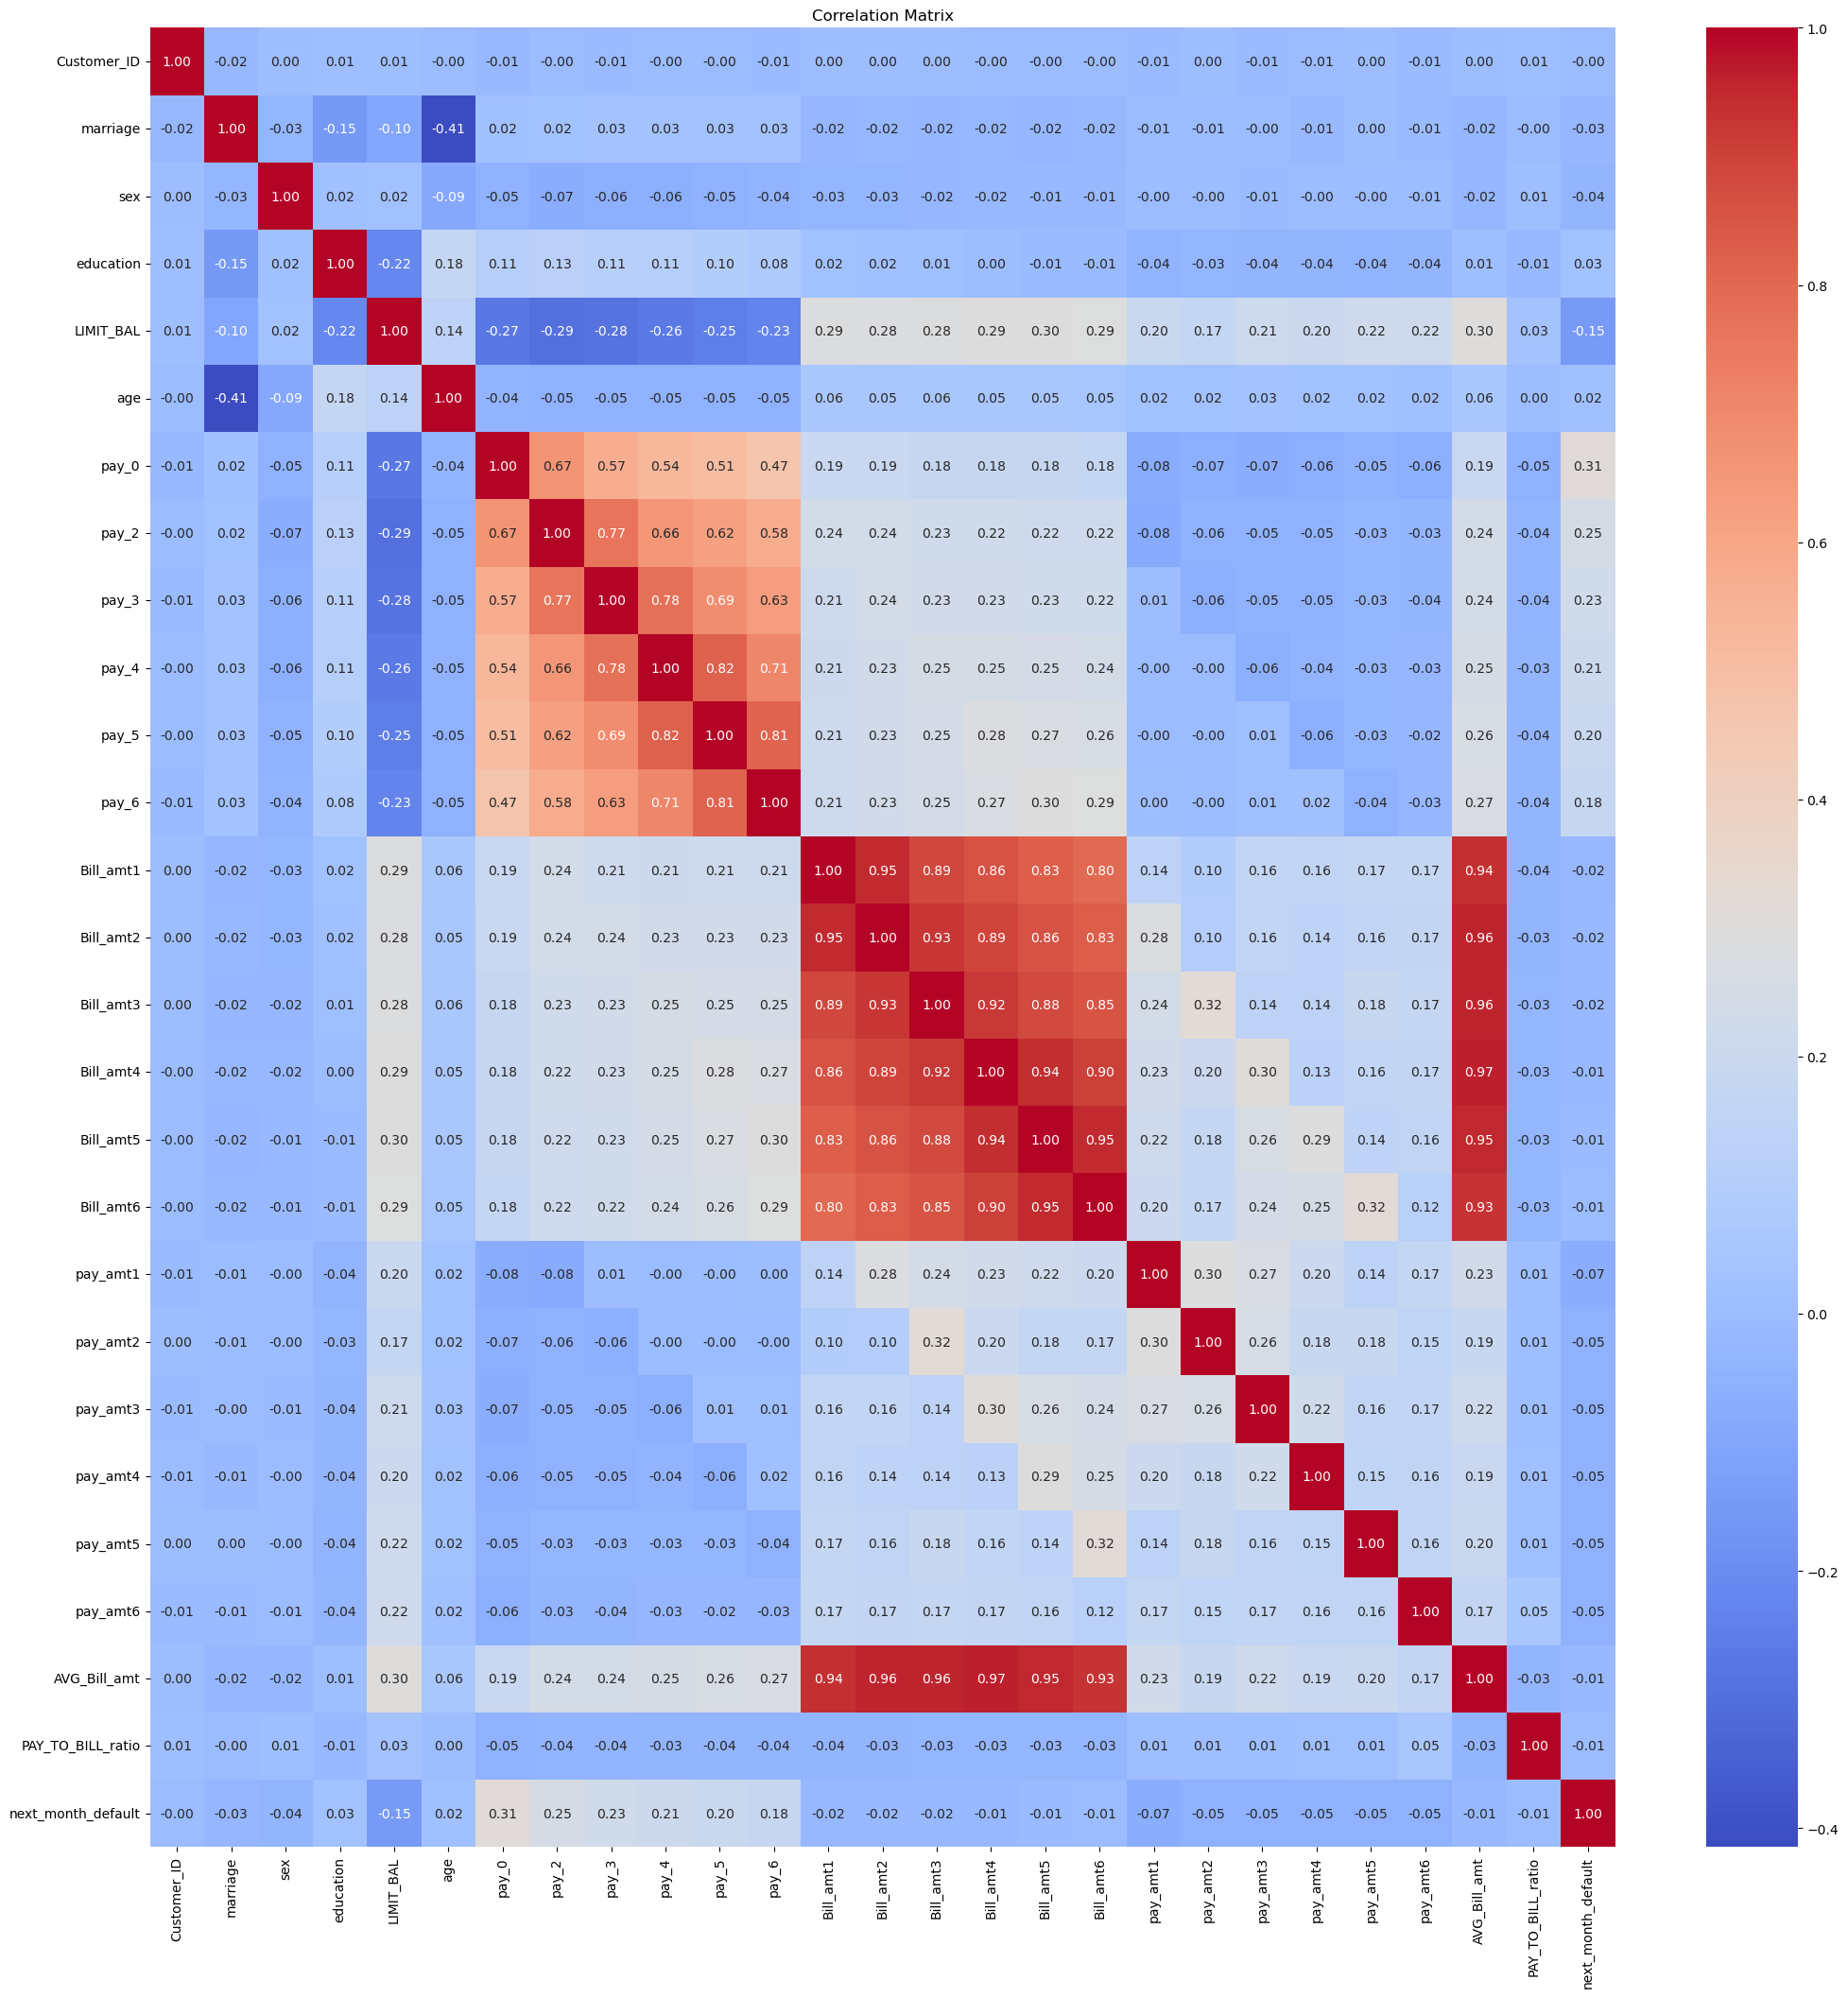

In [12]:
correlation = df.corr(numeric_only=True)
plt.figure(figsize=(25,25))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

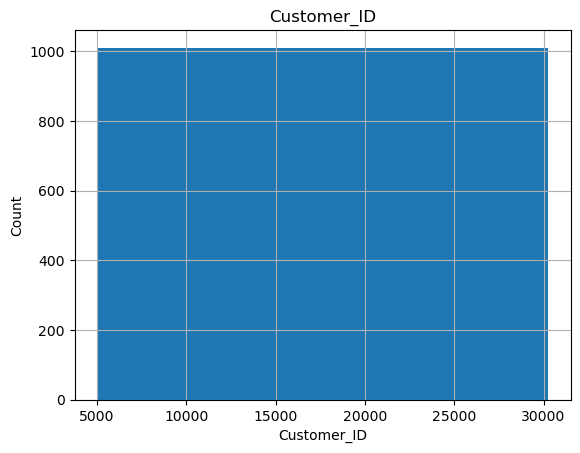

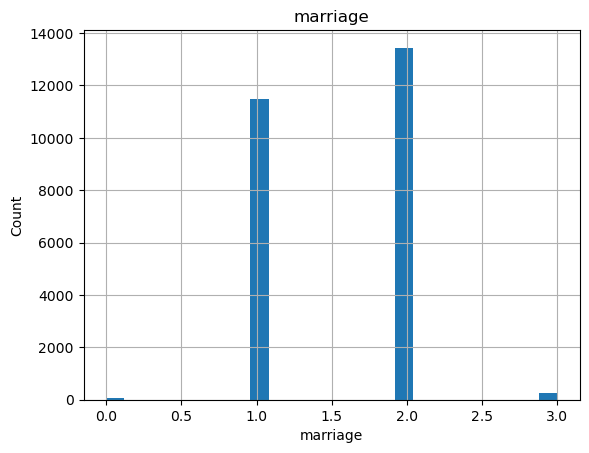

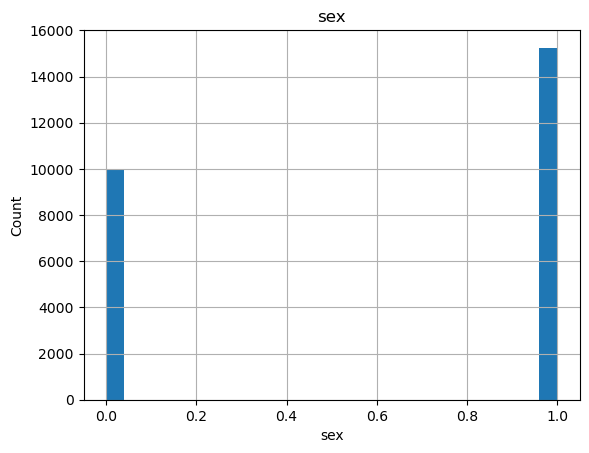

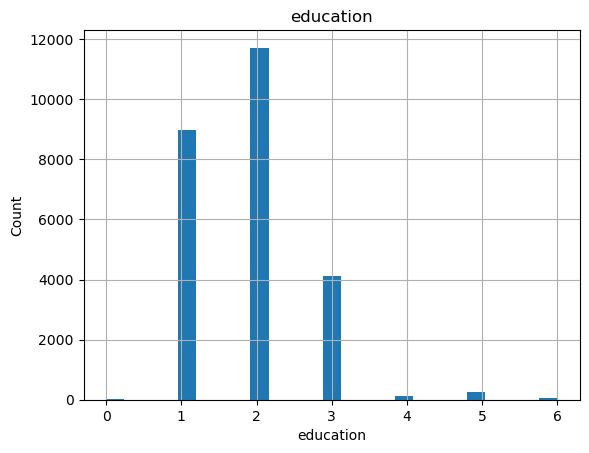

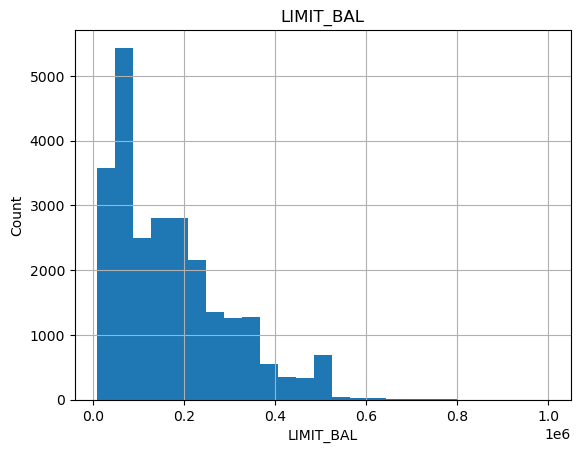

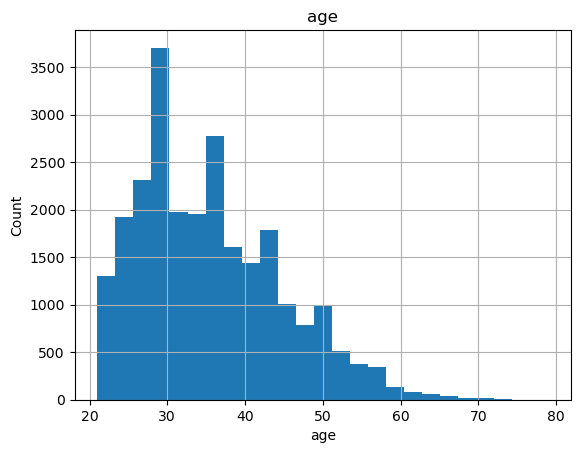

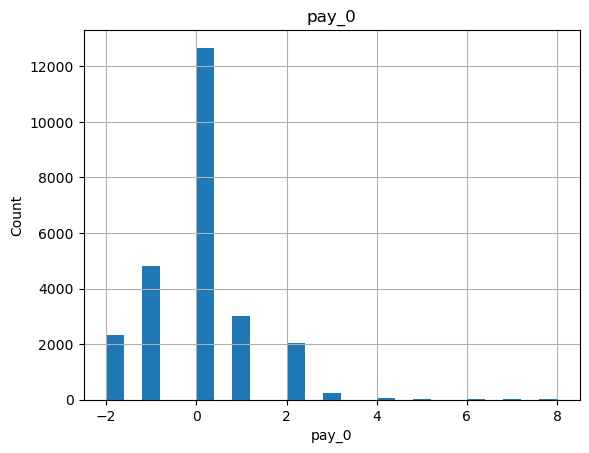

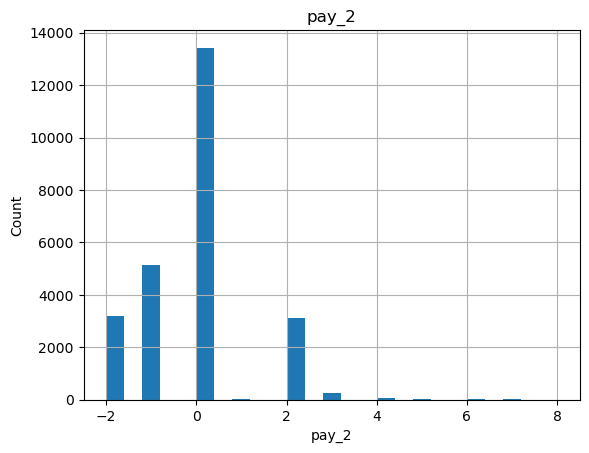

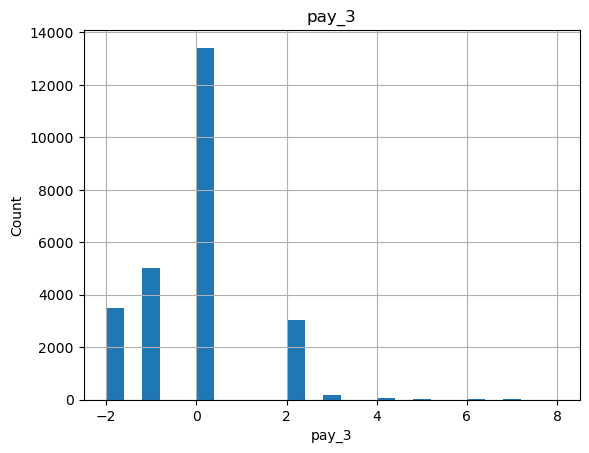

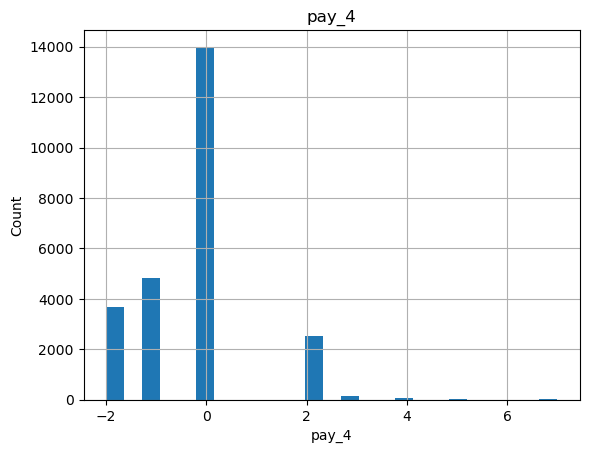

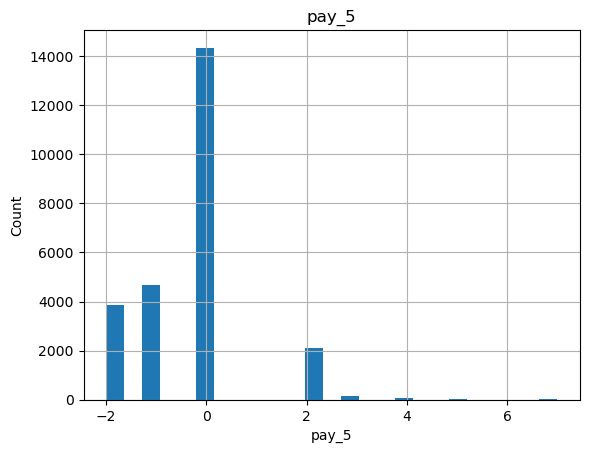

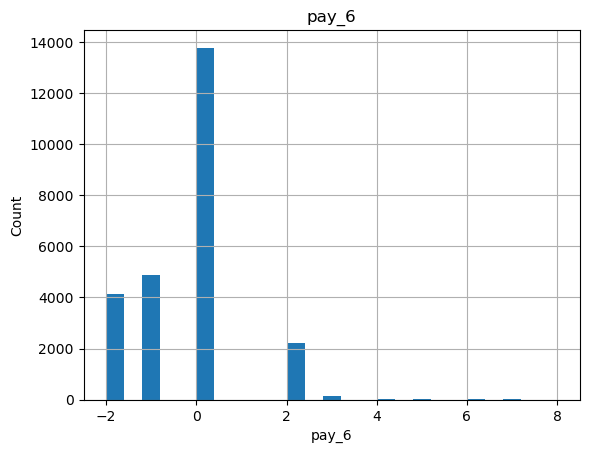

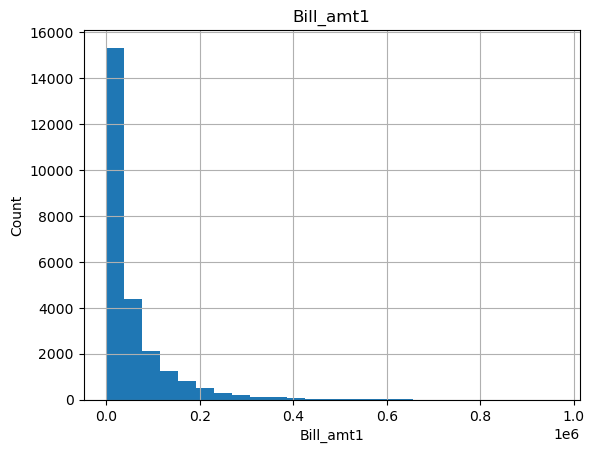

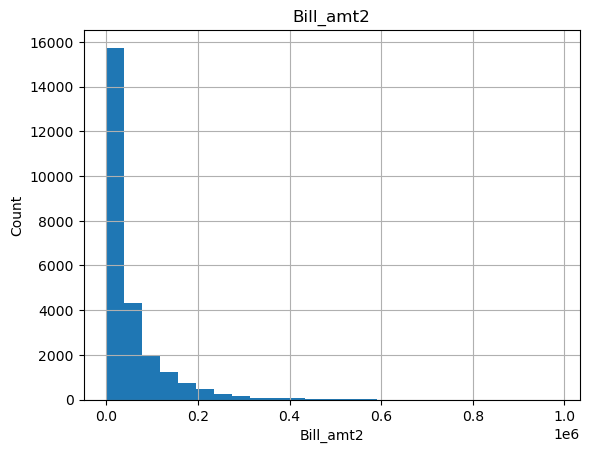

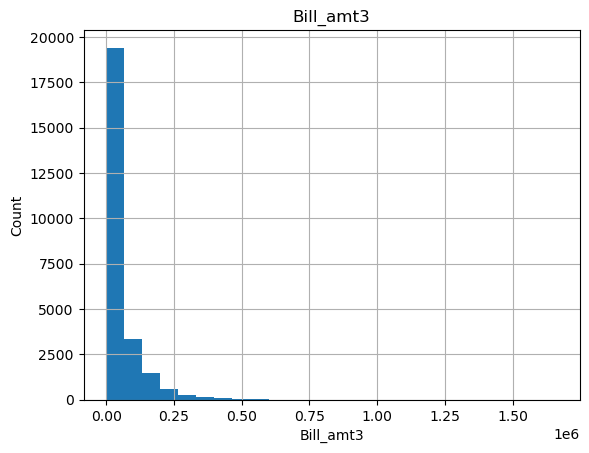

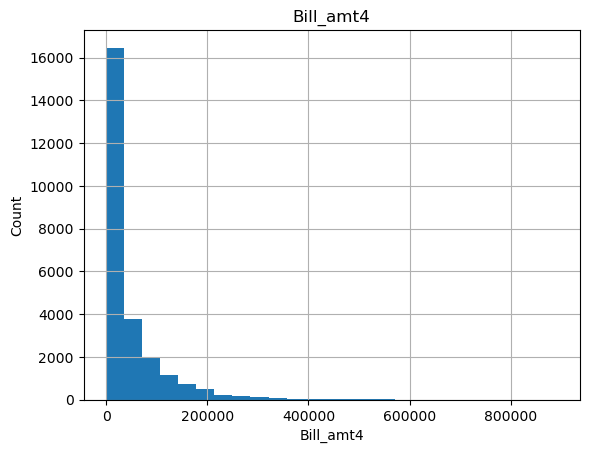

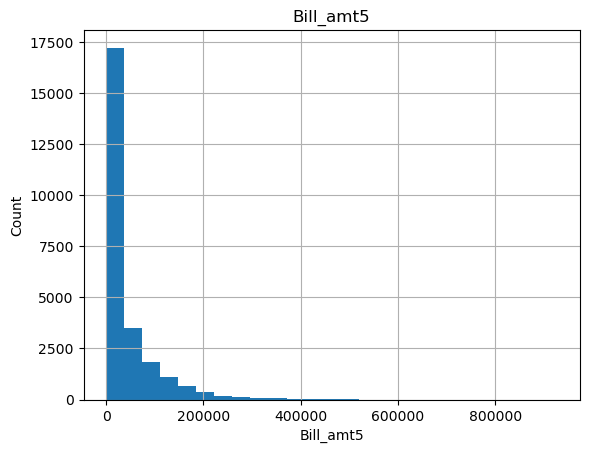

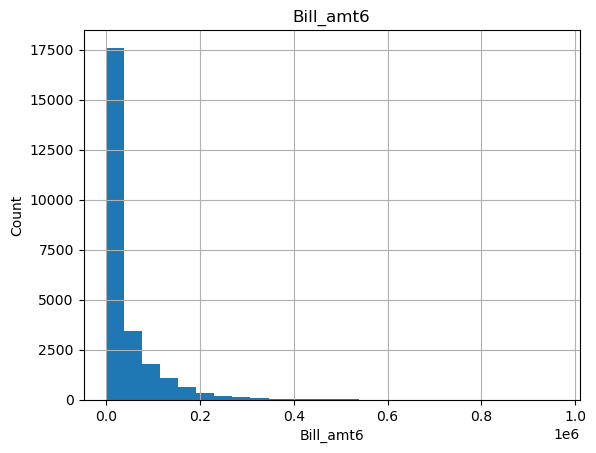

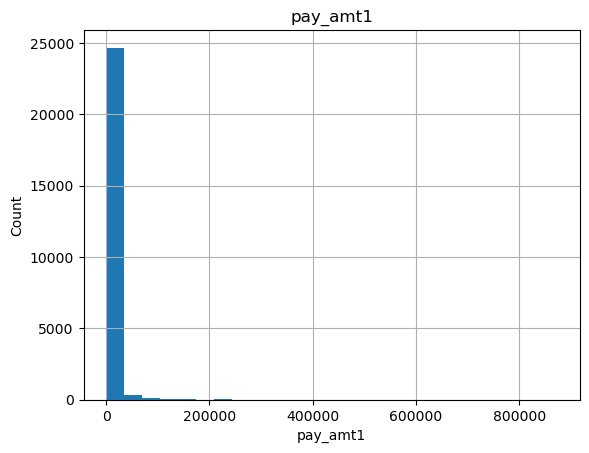

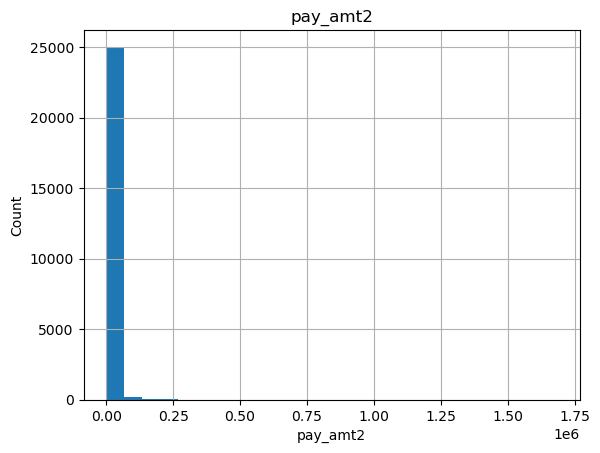

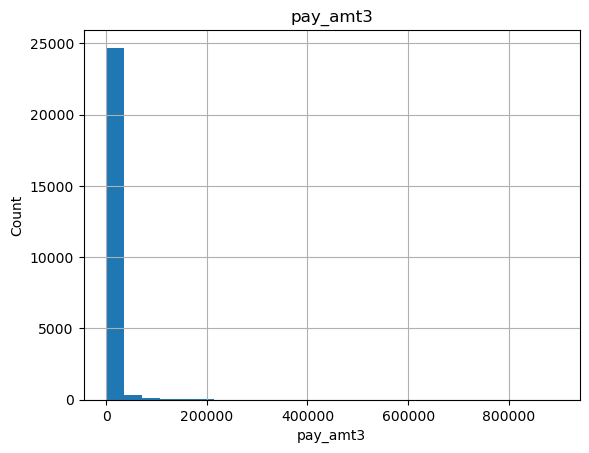

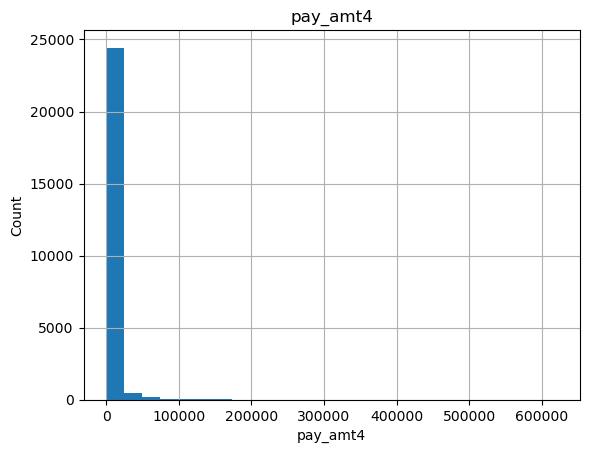

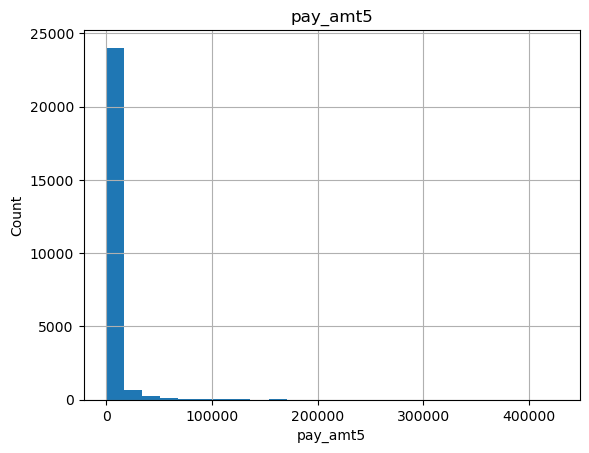

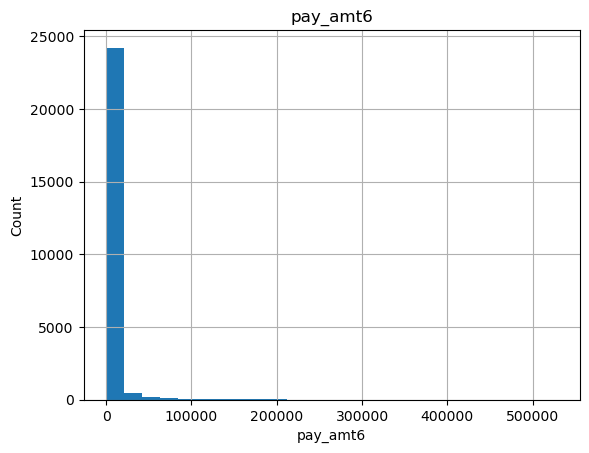

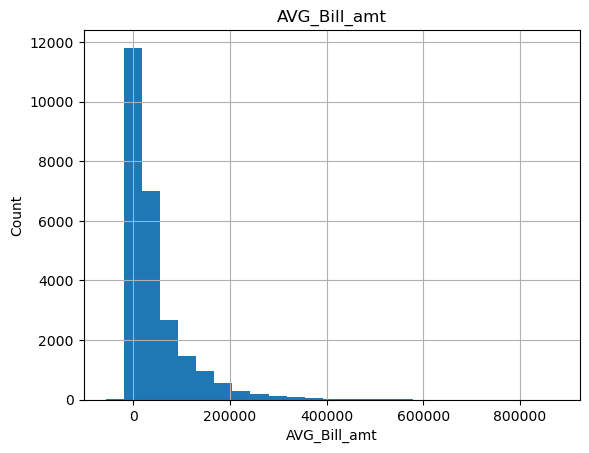

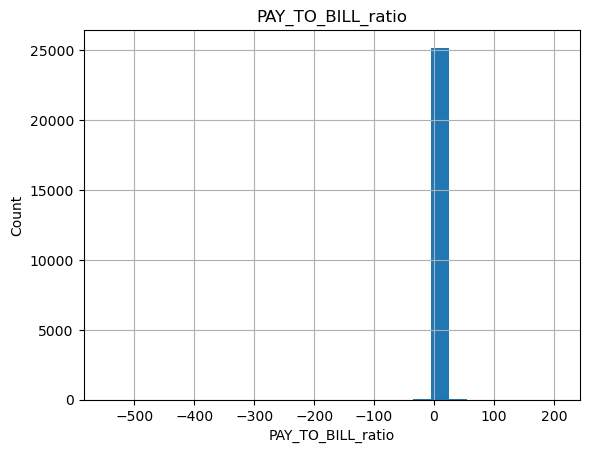

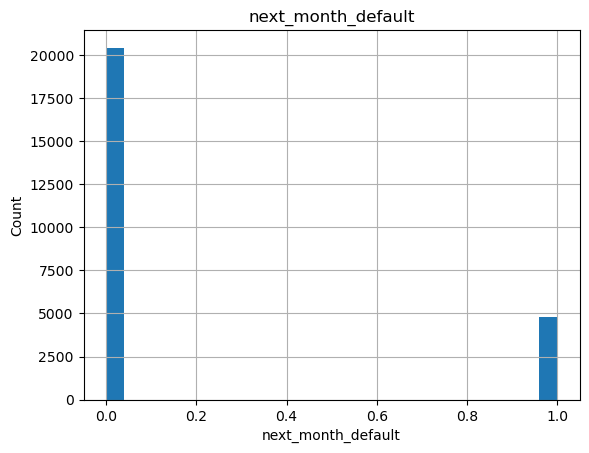

In [13]:
for feature in df:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

## Handling Missing Values

In [14]:
df['age'].median()

34.0

In [15]:
df['age'].fillna(df['age'].median(), inplace=True)

Filled all the null values in age with its median i.e. 34

In [16]:
df['age'].isnull().sum()

0

In [17]:
df= df.drop_duplicates()
df.dropna(inplace=True)

#drop duplicaes if present

In [18]:
df.shape

(25247, 27)

## Data Cleaning and Mapping

In [19]:
df['education'].value_counts()

education
2    11717
1     8988
3     4115
5      253
4      116
6       44
0       14
Name: count, dtype: int64

In [20]:
df['marriage'].value_counts()

marriage
2    13441
1    11480
3      273
0       53
Name: count, dtype: int64

In [21]:
df["education"]=df["education"].map({0:4,1:1,2:2,3:3,4:4,5:4,6:4})
df["marriage"]=df["marriage"].map({0:3,1:1,2:2,3:3})

In education column 0,4,5,6 all are mapped to 4, similarly in marriage 0,3 is mapped to 3.
All these are done to reduce noise from data and make it clean.

In [22]:
df['education'].value_counts()

education
2    11717
1     8988
3     4115
4      427
Name: count, dtype: int64

In [23]:
df['marriage'].value_counts()

marriage
2    13441
1    11480
3      326
Name: count, dtype: int64

In [24]:
df.rename(columns={'pay_0':'pay_1'}, inplace=True)

## Advance EDA Findings

### (a) Target Variable Distribution

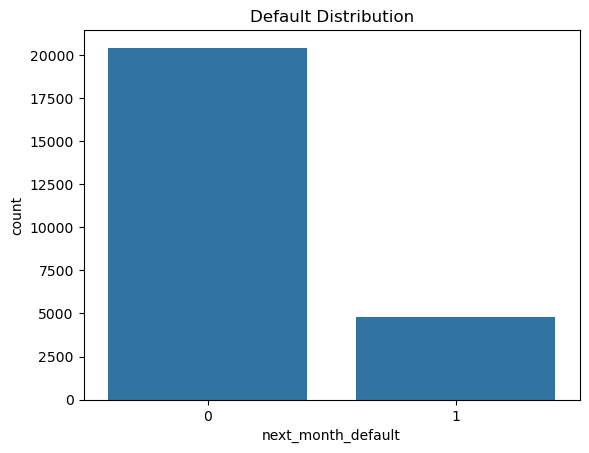

Default Rate: 19.04%


In [25]:
sns.countplot(x='next_month_default', data=df)
plt.title("Default Distribution")
plt.show()

default_rate = df['next_month_default'].mean()
print(f"Default Rate: {default_rate:.2%}")

### (b) Relationship of Limit Balance and Age with Default

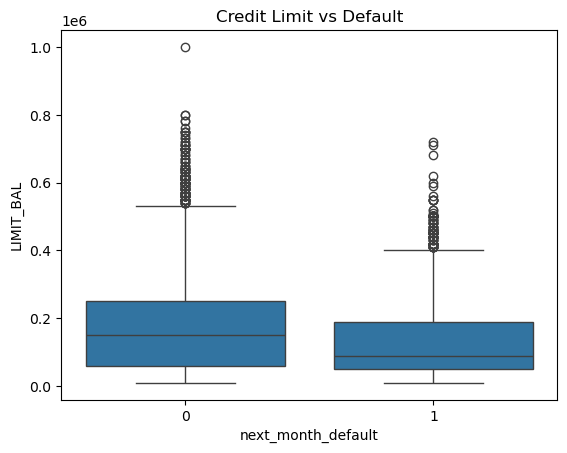

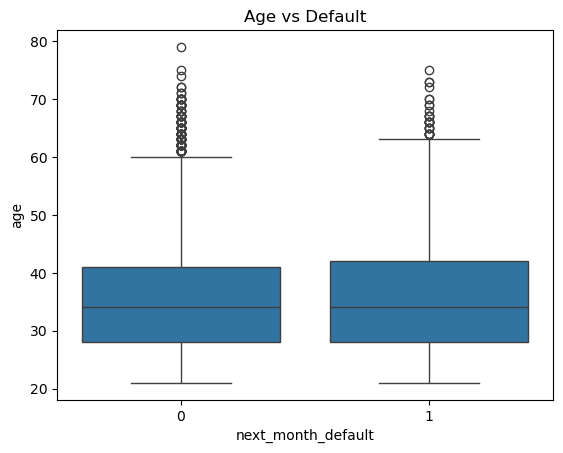

In [26]:
sns.boxplot(x='next_month_default', y='LIMIT_BAL', data=df)
plt.title("Credit Limit vs Default")
plt.show()

sns.boxplot(x='next_month_default', y='age', data=df)
plt.title('Age vs Default')
plt.show()

### (c) Payment Status Trend

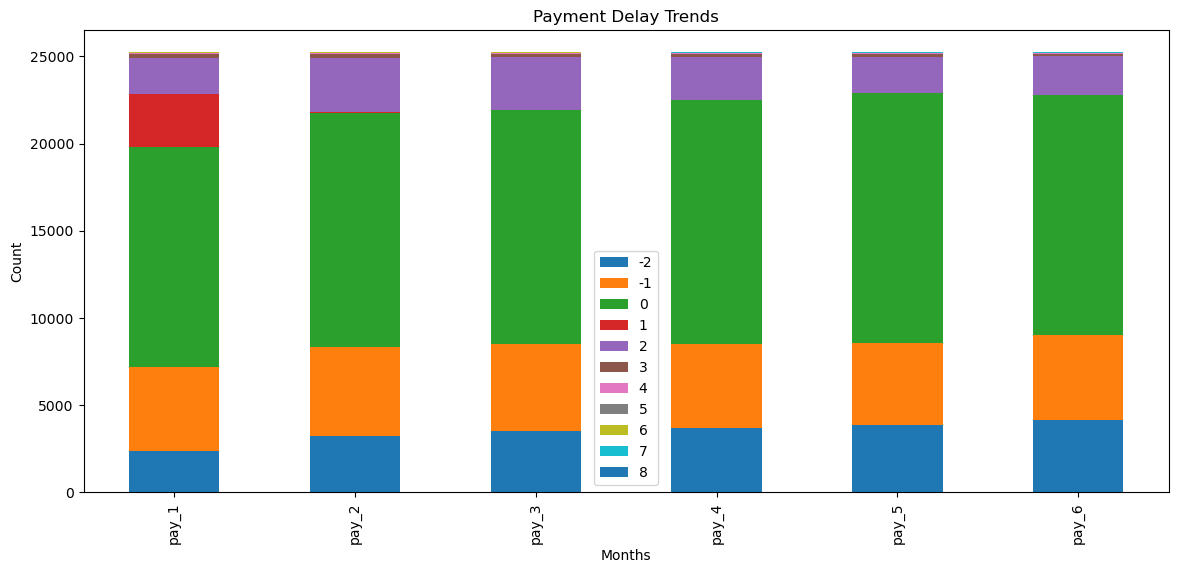

In [27]:
pay_cols = ['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

df[pay_cols].apply(pd.Series.value_counts).T.plot(kind='bar', stacked=True, figsize=(14,6))
plt.title("Payment Delay Trends")
plt.ylabel("Count")
plt.xlabel("Months")
plt.show()


### (d) Univariate Analysis (Categorical)

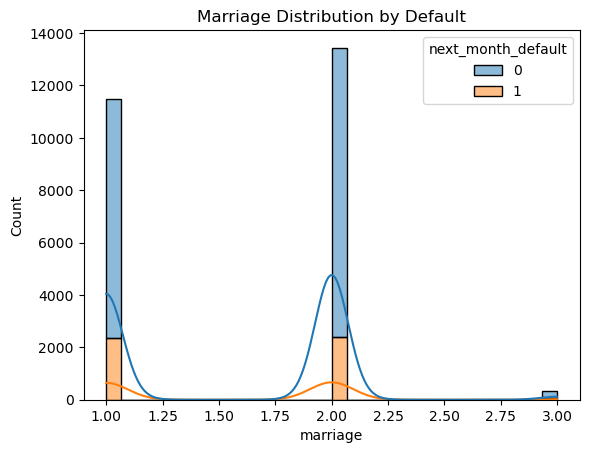

In [28]:
sns.histplot(data=df, x='marriage', hue='next_month_default', kde=True, multiple='stack')
plt.title("Marriage Distribution by Default")
plt.show()

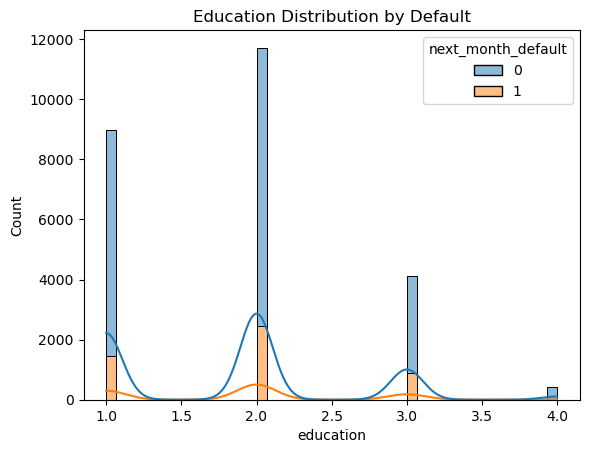

In [29]:
sns.histplot(data=df, x='education', hue='next_month_default', kde=True, multiple='stack')
plt.title("Education Distribution by Default")
plt.show()

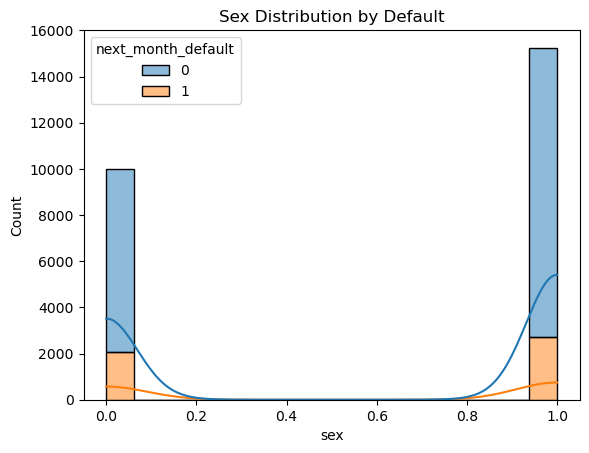

In [30]:
sns.histplot(data=df, x='sex', hue='next_month_default', kde=True, multiple='stack')
plt.title("Sex Distribution by Default")
plt.show()

### (d) Univariate Analysis (Numerical)

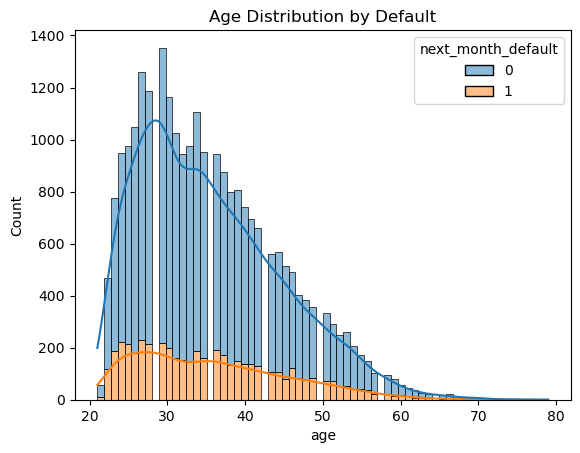

In [31]:
sns.histplot(data=df, x='age', hue='next_month_default', kde=True, multiple='stack')
plt.title("Age Distribution by Default")
plt.show()

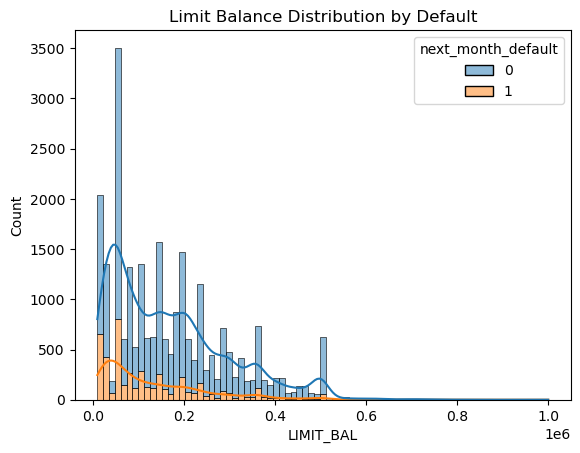

In [32]:
sns.histplot(data=df, x='LIMIT_BAL', hue='next_month_default', kde=True, multiple='stack')
plt.title("Limit Balance Distribution by Default")
plt.show()

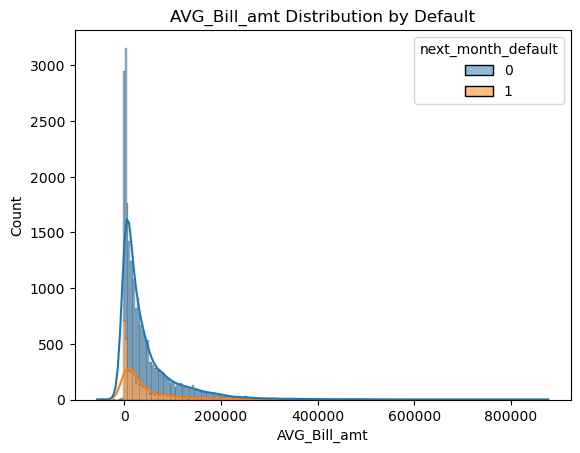

In [33]:
sns.histplot(data=df, x='AVG_Bill_amt', hue='next_month_default', kde=True, multiple='stack')
plt.title("AVG_Bill_amt Distribution by Default")
plt.show()

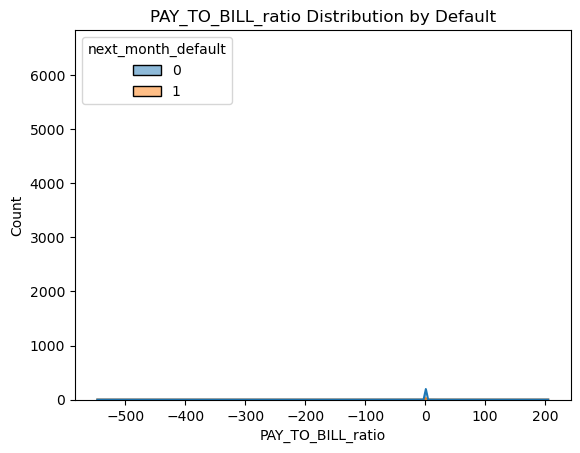

In [34]:
sns.histplot(data=df, x='PAY_TO_BILL_ratio', hue='next_month_default', kde=True)
plt.title("PAY_TO_BILL_ratio Distribution by Default")
plt.show()

## Behavioral Feature Analysis

### 1. Average Delay vs Default

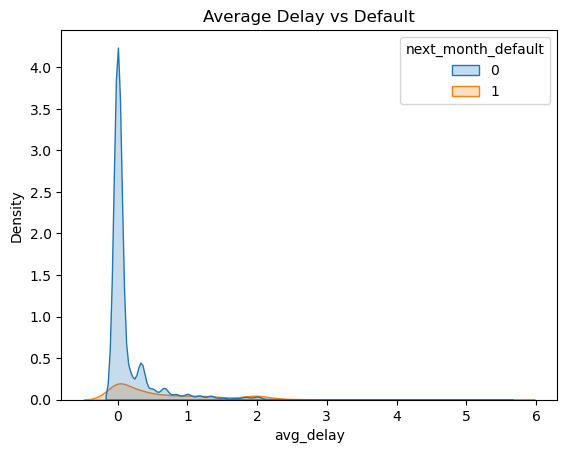

In [35]:
pay_cols = ['pay_1','pay_2','pay_3','pay_4','pay_5','pay_6']
df[pay_cols] = df[pay_cols].replace(-2, 0).replace(-1, 0)  #Treat -1, -2 as "No delay"

df['avg_delay'] = df[pay_cols].mean(axis=1)

sns.kdeplot(data=df, x='avg_delay', hue='next_month_default', fill=True)
plt.title("Average Delay vs Default")
plt.show()


### 2. Count of Delayed Payments vs Default

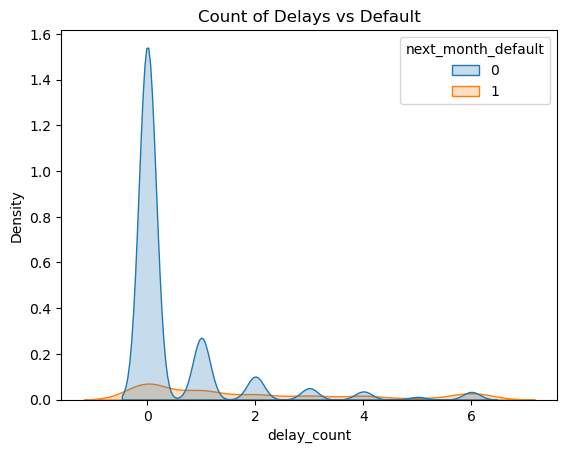

In [36]:
df['delay_count'] = df[pay_cols].gt(0).sum(axis=1)
sns.kdeplot(data=df, x='delay_count', hue='next_month_default', fill=True)
plt.title("Count of Delays vs Default")
plt.show()


### 3. Maximum Delay vs Default

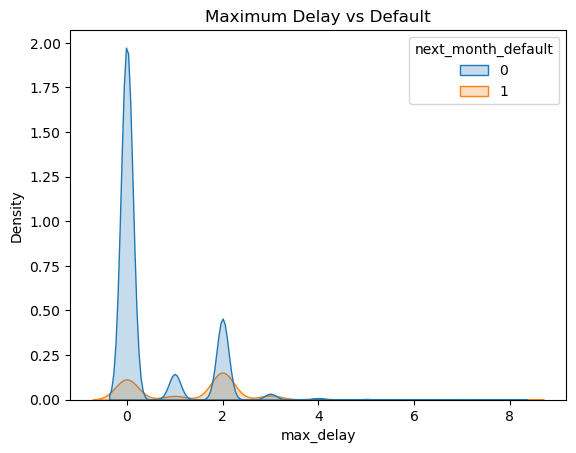

In [37]:
df['max_delay'] = df[pay_cols].max(axis=1)
sns.kdeplot(data=df, x='max_delay', hue='next_month_default', fill=True)
plt.title("Maximum Delay vs Default")
plt.show()


### 4. Recent Delay (Last Month) vs Default

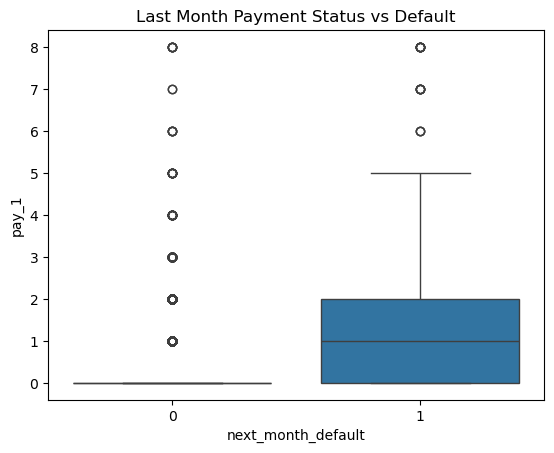

In [38]:
sns.boxplot(data=df, x='next_month_default', y='pay_1')
plt.title("Last Month Payment Status vs Default")
plt.show()


### 5. Trend of Delay (Increasing or Decreasing)

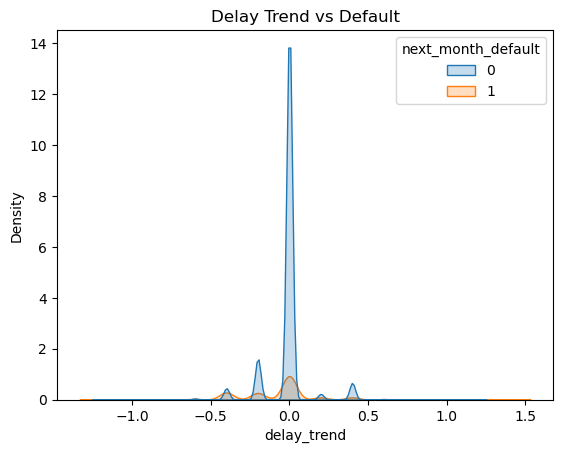

In [39]:
df['delay_trend'] = df[pay_cols].diff(axis=1).mean(axis=1)
sns.kdeplot(data=df, x='delay_trend', hue='next_month_default', fill=True)
plt.title("Delay Trend vs Default")
plt.show()


### 6. Repayment Consistency (STD) vs Default

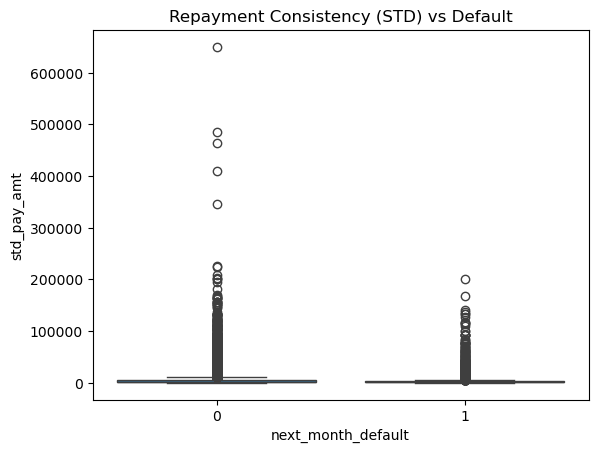

In [40]:
pay_amt_cols = ['pay_amt1','pay_amt2','pay_amt3','pay_amt4','pay_amt5','pay_amt6']
df['std_pay_amt'] = df[pay_amt_cols].std(axis=1)

sns.boxplot(x='next_month_default', y='std_pay_amt', data=df)
plt.title("Repayment Consistency (STD) vs Default")
plt.show()

# Financial Insights and Analysis

### (a) Credit Utilization Ratio

In [41]:
bill_cols = ['Bill_amt1','Bill_amt2','Bill_amt3','Bill_amt4','Bill_amt5','Bill_amt6']
df['avg_bill'] = df[bill_cols].mean(axis=1)
df['credit_utilization_ratio'] = df['avg_bill'] / df['LIMIT_BAL']

In [42]:
df['credit_utilization_ratio']

0        0.691858
1        0.008742
2        0.280120
3        0.410618
4        0.042194
           ...   
25242    0.914589
25243    0.689526
25244    0.025597
25245    0.505842
25246    0.009020
Name: credit_utilization_ratio, Length: 25247, dtype: float64

### (b) Delinquency Streak

In [43]:
df['delinquency_count'] = (df[pay_cols] > 0).sum(axis=1)
df['delinquency_count']

# Count of months with delay > 0

0        3
1        0
2        0
3        0
4        0
        ..
25242    2
25243    0
25244    0
25245    0
25246    0
Name: delinquency_count, Length: 25247, dtype: int64

### (c) Payment Consistency (Std Deviation of Payments)

In [44]:
df['payment_std_dev'] = df[pay_cols].std(axis=1)

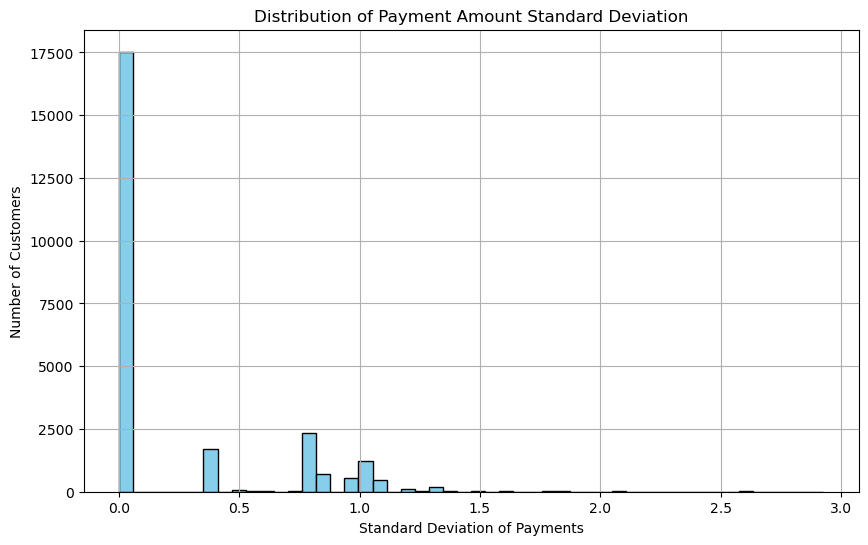

In [45]:
plt.figure(figsize=(10, 6))
plt.hist(df['payment_std_dev'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Payment Amount Standard Deviation')
plt.xlabel('Standard Deviation of Payments')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

## Correlation and Default Influence

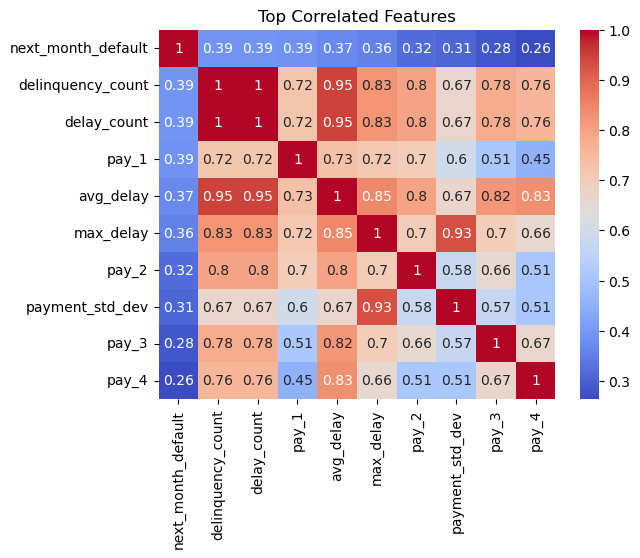

In [46]:
# Correlation with target
correlation_with_default = df.corr()['next_month_default'].sort_values(ascending=False)

# Heatmap of top correlations
top_corr_features = correlation_with_default.abs().sort_values(ascending=False).head(10).index
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='coolwarm')
plt.title("Top Correlated Features")
plt.show()

In [47]:
df.columns

Index(['Customer_ID', 'marriage', 'sex', 'education', 'LIMIT_BAL', 'age',
       'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'Bill_amt1',
       'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6',
       'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'AVG_Bill_amt', 'PAY_TO_BILL_ratio', 'next_month_default', 'avg_delay',
       'delay_count', 'max_delay', 'delay_trend', 'std_pay_amt', 'avg_bill',
       'credit_utilization_ratio', 'delinquency_count', 'payment_std_dev'],
      dtype='object')

## Feature Selection / Final Features

In [48]:
selected_features = [
    'LIMIT_BAL','marriage','education', 'age', 'avg_delay', 'std_pay_amt', 
    'credit_utilization_ratio', 'delinquency_count',
    'AVG_Bill_amt', 'PAY_TO_BILL_ratio'
]

X = df[selected_features]
y = df['next_month_default']

In [49]:
X.head()

,LIMIT_BAL,marriage,education,age,avg_delay,std_pay_amt,credit_utilization_ratio,delinquency_count,AVG_Bill_amt,PAY_TO_BILL_ratio
0,60000,2,2,25.0,1.0,714.956931,0.691858,3,41511.50,0.03
1,290000,2,1,24.0,0.0,1129.473118,0.008742,0,2534.50,0.27
2,180000,1,2,63.0,0.0,123.925072,0.280120,0,50422.00,0.04
3,210000,1,2,43.0,0.0,337.634028,0.410618,0,86229.50,0.04
4,280000,2,1,32.0,0.0,17912.037141,0.042194,0,11814.33,0.72


## Handling Imbalance Dataset using SMOTE

In [50]:
#Before Applying SMOTE
df['next_month_default'].value_counts()

next_month_default
0    20440
1     4807
Name: count, dtype: int64

In [51]:
# Apply SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)

In [52]:
#After Applying SMOTE
y.value_counts()

next_month_default
0    20440
1    20440
Name: count, dtype: int64

## Data Preprocessing

In [53]:
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
X=scaling.fit_transform(X)

#### Train Test Split

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training

### Model 1. Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import fbeta_score, accuracy_score

In [56]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [57]:
model = LogisticRegression(class_weight='balanced', max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [58]:
y_proba = model.predict_proba(X_test)[:, 1] 

thresholds = np.arange(0.1, 0.9, 0.01)

best_f2 = 0
best_threshold = 0

for thresh in thresholds:
    y_pred_thresh = (y_proba >= thresh).astype(int)
    f2 = fbeta_score(y_test, y_pred_thresh, beta=2)
   
    if f2 > best_f2 :
        best_f2 = f2
        best_threshold = thresh

print("Best F2 Score:", round(best_f2, 2))
print("At Threshold:", round(best_threshold, 2))

Best F2 Score: 0.84
At Threshold: 0.2


In [59]:
threshold = 0.20
y_pred_custom = (y_proba >= threshold).astype(int)

print("F2 Score:", fbeta_score(y_test, y_pred_custom, beta=2))
print("Accuracy:", accuracy_score(y_test, y_pred_custom))
print(classification_report(y_test, y_pred_custom))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))  # This remains the same

F2 Score: 0.8385669125395153
Accuracy: 0.5796232876712328
              precision    recall  f1-score   support

           0       0.85      0.19      0.31      4066
           1       0.55      0.97      0.70      4110

    accuracy                           0.58      8176
   macro avg       0.70      0.58      0.50      8176
weighted avg       0.70      0.58      0.50      8176

ROC AUC Score: 0.835826382929833


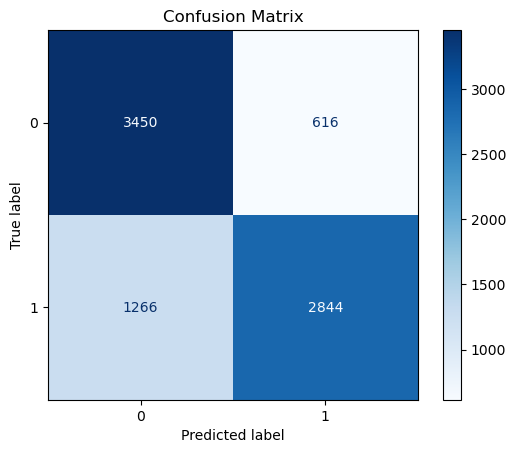

In [60]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

### Model 2.Random Forest (Decision Trees)

In [61]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [62]:
y_proba = rf.predict_proba(X_test)[:, 1] 

thresholds = np.arange(0.1, 0.9, 0.01)

best_f2 = 0
best_threshold = 0

for thresh in thresholds:
    y_pred_thresh = (y_proba >= thresh).astype(int)
    f2 = fbeta_score(y_test, y_pred_thresh, beta=2)
   
    if f2 > best_f2 :
        best_f2 = f2
        best_threshold = thresh

print("Best F2 Score:", round(best_f2, 4))
print("At Threshold:", round(best_threshold, 2))

Best F2 Score: 0.8685
At Threshold: 0.21


In [63]:
threshold = 0.21
y_pred_custom = (y_proba >= threshold).astype(int)

from sklearn.metrics import classification_report, fbeta_score, accuracy_score, roc_auc_score

print("F2 Score:", fbeta_score(y_test, y_pred_custom, beta=2))
print("Accuracy:", accuracy_score(y_test, y_pred_custom))
print(classification_report(y_test, y_pred_custom))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))  # This remains the same

F2 Score: 0.8685340970109182
Accuracy: 0.7243150684931506
              precision    recall  f1-score   support

           0       0.90      0.50      0.64      4066
           1       0.66      0.94      0.78      4110

    accuracy                           0.72      8176
   macro avg       0.78      0.72      0.71      8176
weighted avg       0.78      0.72      0.71      8176

ROC AUC Score: 0.8945701281650816


### Model 3. LightGBM

In [64]:
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)

lgbm_model.fit(X_train, y_train)
y_pred = lgbm_model.predict(X_test)

[LightGBM] [Info] Number of positive: 16330, number of negative: 16374
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001388 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1799
[LightGBM] [Info] Number of data points in the train set: 32704, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499327 -> initscore=-0.002691
[LightGBM] [Info] Start training from score -0.002691
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

In [65]:
y_proba = lgbm_model.predict_proba(X_test)[:, 1] 

thresholds = np.arange(0.1, 0.9, 0.01)

best_f2 = 0
best_threshold = 0

for thresh in thresholds:
    y_pred_thresh = (y_proba >= thresh).astype(int)
    f2 = fbeta_score(y_test, y_pred_thresh, beta=2)
   
    if f2 > best_f2 :
        best_f2 = f2
        best_threshold = thresh

print("Best F2 Score:", round(best_f2, 4))
print("At Threshold:", round(best_threshold, 2))

Best F2 Score: 0.8862
At Threshold: 0.23


In [66]:
threshold = 0.23
y_pred_custom = (y_proba >= threshold).astype(int)

from sklearn.metrics import classification_report, fbeta_score, accuracy_score, roc_auc_score

print("F2 Score:", fbeta_score(y_test, y_pred_custom, beta=2))
print("Accuracy:", accuracy_score(y_test, y_pred_custom))
print(classification_report(y_test, y_pred_custom))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))  # This remains the same

F2 Score: 0.8862169815700293
Accuracy: 0.8073630136986302
              precision    recall  f1-score   support

           0       0.91      0.68      0.78      4066
           1       0.75      0.93      0.83      4110

    accuracy                           0.81      8176
   macro avg       0.83      0.81      0.80      8176
weighted avg       0.83      0.81      0.80      8176

ROC AUC Score: 0.936785885684263


### Model 4. XgBoost Classifier--Final Model taken

In [67]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
y_proba = xgb.predict_proba(X_test)[:, 1]  

In [68]:
y_proba = xgb.predict_proba(X_test)[:, 1]

thresholds = np.arange(0.1, 0.9, 0.01)

best_f2 = 0
best_threshold = 0

for thresh in thresholds:
    y_pred_thresh = (y_proba >= thresh).astype(int)
    f2 = fbeta_score(y_test, y_pred_thresh, beta=2)
   
    if f2 > best_f2 :
        best_f2 = f2
        best_threshold = thresh

print("Best F2 Score:", round(best_f2, 4))
print("At Threshold:", round(best_threshold, 2))

Best F2 Score: 0.8867
At Threshold: 0.19


In [69]:
threshold = 0.19
y_pred_custom = (y_proba >= threshold).astype(int)

from sklearn.metrics import classification_report, fbeta_score, accuracy_score, roc_auc_score

print("F2 Score:", fbeta_score(y_test, y_pred_custom, beta=2))
print("Accuracy:", accuracy_score(y_test, y_pred_custom))
print(classification_report(y_test, y_pred_custom))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))  # This remains the same

F2 Score: 0.8867165834719911
Accuracy: 0.8003913894324853
              precision    recall  f1-score   support

           0       0.91      0.67      0.77      4066
           1       0.74      0.93      0.82      4110

    accuracy                           0.80      8176
   macro avg       0.82      0.80      0.80      8176
weighted avg       0.82      0.80      0.80      8176

ROC AUC Score: 0.9366450225775913


### Final F2 Score: 0.8867 -> 88.7%

##### Just to make both Accuracy and F2 score better i have tried many threshold values and found out at 0.335 accuracy coming to be 86% anf F2 Score 87.2%

In [70]:
y_proba = xgb.predict_proba(X_test)[:, 1]

threshold = 0.335
y_pred_custom = (y_proba >= threshold).astype(int)

from sklearn.metrics import classification_report, fbeta_score, accuracy_score, roc_auc_score

print("F2 Score:", fbeta_score(y_test, y_pred_custom, beta=2))
print("Accuracy:", accuracy_score(y_test, y_pred_custom))
print(classification_report(y_test, y_pred_custom))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))  # This remains the same

F2 Score: 0.8720452458065452
Accuracy: 0.860445205479452
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      4066
           1       0.85      0.88      0.86      4110

    accuracy                           0.86      8176
   macro avg       0.86      0.86      0.86      8176
weighted avg       0.86      0.86      0.86      8176

ROC AUC Score: 0.9366450225775913


# Model Prediction

In [71]:
feature_names = [
   'LIMIT_BAL','marriage','education', 'age', 'avg_delay', 'std_pay_amt', 
    'credit_utilization_ratio', 'delinquency_count',
    'AVG_Bill_amt', 'PAY_TO_BILL_ratio'
]

input_values = []
print("Enter customer data for prediction:")
for feature in feature_names:
    value = float(input(f"{feature}: "))
    input_values.append(value)

new_data = pd.DataFrame([input_values], columns=feature_names)

scaling=StandardScaler()
new_data_scaled = scaling.fit_transform(new_data)  # Use your fitted scaler

predicted_class = xgb.predict(new_data_scaled)[0]
predicted_proba = xgb.predict_proba(new_data_scaled)[0][1]


print("\n--- Prediction Result ---")
print("Prediction (0 = No Default, 1 = Default):", predicted_class)

Enter customer data for prediction:


LIMIT_BAL:  21000
marriage:  2
education:  3
age:  23
avg_delay:  2345
std_pay_amt:  24321
credit_utilization_ratio:  0.47
delinquency_count:  3
AVG_Bill_amt:  23455
PAY_TO_BILL_ratio:  0.7



--- Prediction Result ---
Prediction (0 = No Default, 1 = Default): 1


In [75]:
if (predicted_class == 1):
  print('The person will default')
else:
  print('The person will not default')


The person will default


# Prediction of Validation Dataset

In [76]:
val_dataset=pd.read_csv('validate_dataset_final.csv')
val_dataset.head()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,Bill_amt1,Bill_amt2,Bill_amt3,Bill_amt4,Bill_amt5,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio
0,1,1,1,2,220000,32,0,0,0,0,0,0,28853.10,29144.77,27172.12,22066.47,17831.13,15670.47,2000.03,3999.90,1419.80,1999.97,3000.21,30788.71,23456.33,0.31
1,2,2,0,1,350000,35,-1,-1,-1,0,0,0,4438.78,33718.18,14284.09,16425.68,10832.78,2261.45,33891.01,16267.19,4026.80,234.10,1565.11,26346.39,13660.33,1.00
2,3,2,1,1,310000,39,0,0,0,0,0,0,300500.53,265766.60,245457.90,249435.52,240520.57,246524.45,11026.94,10499.83,14000.32,10000.12,10000.16,10000.21,258034.17,0.04
3,4,1,0,2,20000,47,0,0,0,2,2,2,10628.45,11650.67,14252.14,13678.06,15040.17,14749.97,1200.00,2799.83,0.14,1499.93,0.02,1000.26,13333.33,0.08
4,5,2,1,2,500000,30,0,0,0,0,0,0,98617.77,73464.07,84740.39,72510.59,69054.15,64841.30,25463.94,43095.31,7521.96,9065.17,8841.07,12000.21,77204.50,0.23


In [77]:
val_dataset.isnull().sum()

Customer_ID          0
marriage             0
sex                  0
education            0
LIMIT_BAL            0
age                  0
pay_0                0
pay_2                0
pay_3                0
pay_4                0
pay_5                0
pay_6                0
Bill_amt1            0
Bill_amt2            0
Bill_amt3            0
Bill_amt4            0
Bill_amt5            0
Bill_amt6            0
pay_amt1             0
pay_amt2             0
pay_amt3             0
pay_amt4             0
pay_amt5             0
pay_amt6             0
AVG_Bill_amt         0
PAY_TO_BILL_ratio    0
dtype: int64

## Data Preprocessing before Prediction


In [78]:
val_dataset["education"]=val_dataset["education"].map({0:4,1:1,2:2,3:3,4:4,5:4,6:4})
val_dataset["marriage"]=val_dataset["marriage"].map({0:3,1:1,2:2,3:3})

In [79]:
pay_amt_cols_val = ['pay_amt1','pay_amt2','pay_amt3','pay_amt4','pay_amt5','pay_amt6']
val_dataset['std_pay_amt'] = val_dataset[pay_amt_cols_val].std(axis=1)

In [80]:
pay_cols_val = ['pay_0','pay_2','pay_3','pay_4','pay_5','pay_6']
val_dataset[pay_cols_val] = val_dataset[pay_cols_val].replace(-2, 0).replace(-1, 0)  # Treat -1, -2 as "No delay"

val_dataset['avg_delay_val'] = val_dataset[pay_cols_val].mean(axis=1)

In [81]:
bill_cols_val = ['Bill_amt1','Bill_amt2','Bill_amt3','Bill_amt4','Bill_amt5','Bill_amt6']
val_dataset['avg_bill'] = val_dataset[bill_cols_val].mean(axis=1)
val_dataset['credit_utilization_ratio'] = val_dataset['avg_bill'] / df['LIMIT_BAL']

In [82]:
# Count of months with delay > 0
val_dataset['delinquency_count'] = val_dataset[pay_cols_val].apply(lambda row: sum(x > 0 for x in row), axis=1)
val_dataset['delinquency_count']

0       0
1       0
2       0
3       3
4       0
       ..
5011    0
5012    0
5013    1
5014    0
5015    0
Name: delinquency_count, Length: 5016, dtype: int64

## Prediction for Validation Dataset


In [83]:
selected_features = [
    'LIMIT_BAL','marriage','education', 'age', 'avg_delay_val', 'std_pay_amt', 
    'credit_utilization_ratio', 'delinquency_count',
    'AVG_Bill_amt', 'PAY_TO_BILL_ratio'
]

In [84]:
X_val=val_dataset[selected_features]

In [85]:
y_pred_validation = xgb.predict(X_val)

In [86]:
y_pred_validation.T

array([1, 1, 1, ..., 0, 1, 1])

## Prediction File(CSV)

In [87]:
customer_ids = val_dataset['Customer_ID']

y_pred = xgb.predict(X_val)

submission = pd.DataFrame({
    'customer_id': customer_ids,
    'prediction': y_pred
})
submission

,customer_id,prediction
0,1,1
1,2,1
2,3,1
3,4,0
4,5,1
...,...,...
5011,5012,1
5012,5013,1
5013,5014,0
5014,5015,1


In [88]:
submission['prediction'].value_counts()

prediction
1    3422
0    1594
Name: count, dtype: int64

In [89]:
submission.to_csv('submission_23115149.csv', index=False)

In [90]:
submission.to_csv('C:/Users/Admin/OneDrive/Documents/submission_23115149.csv', index=False)